# DOUBLES DIFFERENCES

Cette application est inspirée de l'article de K. A. Kiel and K. T. McClain (1995) : "The Effect of an Incinerator Siting on Housing Appreciation Rates", *Journal of Urban Economics*, 37(3):311-323, et du manuel de Wooldridge (voir bibliographie du cours).

Kiel et McClain (1995) étudient l'impact de l'environnement sur le prix de l'immobilier. Pour cela, elles étudient l'effet de la construction d'un nouvel incinérateur de déchets sur la valeur de l'immobilier dans une ville du Massachussetts. 

Le projet s'ébruite en 1978, la construction devient effective en 1981, et l'incinérateur fonctionne à partir de 1985. Nous utilisons ici des données simplifiées, disponibles sur internet : kielmc.raw. Les données sont également dans le répertoire : **TD9_kielmc.rds**

# Introduction

Comment s'appelle ce type d'évènement, mobilisé dans les études d'économétrie appliquée ?

<font color=green> 
    
Réponse : une expérience naturelle, ou quasi-expérience.
    
Wooldridge : *"The methodology used in the previous example has numerous applications, especially when the data arise from a natural experiment (or a quasi-experiment). A natural experiment occurs when some exogenous event -- often a change in government policy -- changes the environment in which individuals, families, firms, or cities operate."*.
</font>

De quelles informations avons-nous besoin pour analyser l'impact de l'incinérateur sur la valeur de l'immobilier en double différence ? 

<font color=green> 

Réponse : de la date (quelle date : construction effective, mise en service, ou rumeur de construction ? réponse : rumeur, ou début officiel du projet) ; des prix de l'immobilier avant et après cette date ; d'une zone de contrôle qui reste à définir. "Avant" sera donc 1978 (avant les rumeurs), "après" sera 1981 (construction effective). 

Wooldridge : *"A natural experiment always has a control group, which is not affected by the policy change, and a treatment group, which is thought to be affected by the policy change. Unlike a true experiment, in which treatment and control groups are randomly and explicitly chosen, the control and treatment groups in natural experiments arise from the particular policy change. To control for systematic differences between the control and treatment groups, we need two years of data, one before the policy change and one after the change. Thus, our sample is usefully broken down into four groups: the control group before the change, the control group after the change, the treatment group before the change, and the treatment group after the change."*.
</font>

Quel est le résultat attendu ? 

<font color=green>Réponse : nous nous attendons à ce que le prix des maisons les plus proches du site baisse avec la construction de l'incinérateur. En effet, l'incinérateur représente une pollution à la fois visuelle et environnementale. Si cette pollution visuelle et environnementale compte pour les individus, alors leur DAP pour le bien sera moins importante à qualité identique après la mise en place du projet.</font>

# 1. Les données

Ouvrir les données : **TD9_kielmc.rds**.

In [1]:
ds<-readRDS(file = "TD9_kielmc")
head(ds)

year,age,nbh,cbd,intst,price,rooms,area,land,baths,dist,wind
1978,48,4,3000,1000,60000,7,1660,4578,1,10700,3
1978,83,4,4000,1000,40000,6,2612,8370,2,11000,3
1978,58,4,4000,1000,34000,6,1144,5000,1,11500,3
1978,11,4,4000,1000,63900,5,1136,10000,1,11900,3
1978,48,4,4000,2000,44000,5,1868,10000,1,12100,3
1978,78,4,3000,2000,46000,6,1780,9500,3,10000,3


Consulter le codebook et répondre aux questions :
![title](TD9_codebook.png) 

a) Quelle sera la variable dépendante ? 

b) Quelle sera la variable d'intérêt ?

c) A quoi peuvent servir les autres variables ? Donner un exemple.

<font color=green> 

Réponse : 

a) variable dépendante (que l'on cherche à expliquer) = $price$. 

b) variable d'intérêt (celle dont on cherche à mesurer l'impact causal) = $dist$. Remarque : autre variable d'intérêt qui aurait pu nous intéresser : $wind$ (en effet, en matière de pollution de l'air, la distance est peut être moins importante que le sens du vent). 

c) les autres variables peuvent servir de variable de contrôle pour éviter des biais éventuels ou améliorer la précision.

</font> 

Considérons que le travail de nettoyage des données a été fait. Quelles variables devrions-nous créer pour notre analyse : 

a) afin d'avoir un groupe de traitement et un groupe de contrôle ? *Indice : il faut définir les groupes de traitement/contrôle en fonction d'un seuil de distance à l'incinérateur : + ou - 5km soit 15840 pieds*.

b) afin d'étudier l'effet de la distance sur la variation du prix exprimée non plus en niveau mais en pourcentage ? *Indice : penser à la transformation logarithmique*.

<font color=green> 

Réponse : 

a) une dummy à partir de la variable de distance $dist$ : $\textbf{nearinc} = 1$ si dist est inférieure à 15840 pieds soit environ 5km.$

b) lprice = log(price) qui sera notre nouvelle variable dépendante. Ainsi, le coefficient $\gamma$ devant la dummy de distance $nearinc$ s'interprétera comme une semi-élasticité : une maison située dans un rayon inférieur à 5km de l'incinérateur est vendue à un prix de $\gamma \times 100 \% plus/moins élevé.

</font>

Créer ces 2 variables.

In [2]:
ds$nearinc <- ifelse(ds$dist<15840,1,0)
ds$lprice <- log(ds$price)

# 2. Analyses "naïves"

Nous commençons par une **analyse naïve avec données en coupe** : nous utilisons les données de 1981 seulement et estimons : $lprice^{81}_{i} = \alpha^{81} + \gamma^{81} nearinc_{i} + u^{81}_{i}$. Interpréter.

In [3]:
naive1<-lm(lprice~nearinc,data=ds[ds$year==1981,])
summary(naive1)


Call:
lm(formula = lprice ~ nearinc, data = ds[ds$year == 1981, ])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.86626 -0.21706  0.02718  0.24035  1.16633 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.74242    0.03428 342.543  < 2e-16 ***
nearinc     -0.40257    0.06459  -6.233 5.06e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3462 on 140 degrees of freedom
Multiple R-squared:  0.2172,	Adjusted R-squared:  0.2116 
F-statistic: 38.85 on 1 and 140 DF,  p-value: 5.061e-09


<font color=green> 

Réponse : "En 1981, les maisons situées dans un rayon de 5km de l'incinérateur se vendent 40%  moins chères que les maisons situées à plus de 5km.". A noter : la t-statistique est plus grand que 5 en valeur aboslue, on peut rejeter l'hypothèse que la valeur des maisons est la même indépendamment de la distance à l'incinérateur. 


ABUSIF : "Toutes choses égales par ailleurs, ..." car on n'a même pas contrôlé pour l'âge ou la taille de la maison ! Egalement ABUSIF : "La présence de l'incinérateur à moins de 5km cause une baisse de prix de vente de 30700 dollars en moyenne." : aucun moyen de s'assurer de la relation causale à ce stade de l'analyse ! 

</font>

Quelle est la condition pour que ce résultat puisse être interprété comme une causalité ? Pourquoi peut-on penser que cette condition n'est pas remplie ? 

<font color=green> Réponse : il faudrait que les maisons aient à l'origine (en l'absence de cet incinérateur) la même valeur, qu'elles soient proches ou plus éloignées. On peut suspecter que ce n'est pas le cas car les incinérateurs ne sont pas implantés au hasard. On a des raisons de penser qu'ils sont implantés là où les maisons ont une valeur moindre : le terrain y est moins cher, les votants (plus défavorisés) moins susceptibles de manifester leur mécontentement par les urnes... </font>

Comment tester cela avec les données dont nous disposons ? Effectuer le test sur deux variables qui vous sembleront pertinentes. Conclure.

In [4]:
t.test(age~nearinc, data=ds)
t.test(rooms~nearinc, data=ds)


	Welch Two Sample t-test

data:  age by nearinc
t = -6.0601, df = 158.48, p-value = 9.564e-09
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -31.86424 -16.19965
sample estimates:
mean in group 0 mean in group 1 
       10.82222        34.85417 



	Welch Two Sample t-test

data:  rooms by nearinc
t = 6.2777, df = 143.95, p-value = 3.816e-09
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.4910195 0.9423138
sample estimates:
mean in group 0 mean in group 1 
       6.800000        6.083333 


<font color=green> Réponse : nous avons la chance d'avoir des informations sur les caractéristiques des maisons. On peut le faire avce un test d'égalité de moyennes. Ici les deux exemples suggèrent qu'on rejette H0 d'égalité des moyennes : les maisons diffèrent grandement selon si elles sont à +/- 5km de cet incinérateur.</font>

**Second type d'analyse naïve** : Nous pensons avoir identifié un meilleur contrefactuel pour les maisons proches d'un incinérateur : ces mêmes maisons, avant que l'incinérateur ne soit contruit. Quelle sera la régression ? Estimer.

<font color=green> Réponse : $price^{T}_{it} = \alpha + \beta y81^{T}_{t} + u^{T}_{it}$ (donc sur sous-échantillon des traités, avant-après). Baisé car tient compte de l'impact de la construction mais aussi de tous les autres facteurs qui influencent les prix qui ont évolué dans le temps (la tendance temporelle).  </font>

In [5]:
naive2<-lm(lprice~factor(year),data=ds[ds$nearinc==1,])
summary(naive2)


Call:
lm(formula = lprice ~ factor(year), data = ds[ds$nearinc == 1, 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7185 -0.2368 -0.1069  0.1572  1.6660 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      10.94550    0.05599 195.489  < 2e-16 ***
factor(year)1981  0.39435    0.08674   4.546 1.62e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.419 on 94 degrees of freedom
Multiple R-squared:  0.1802,	Adjusted R-squared:  0.1715 
F-statistic: 20.67 on 1 and 94 DF,  p-value: 1.625e-05


# 3. Doubles différences

Ecrire et estimer par MCO la régression par double différence simple qui va permettre de déterminer si la construction de l'incinérateur a un impact sur la valeur immobilière des maisons. 

In [6]:
dd<-lm(lprice~nearinc + factor(year) + nearinc:factor(year),data=ds)
summary(dd)


Call:
lm(formula = lprice ~ nearinc + factor(year) + nearinc:factor(year), 
    data = ds)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.11957 -0.20328  0.02226  0.18909  1.66604 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)              11.28542    0.03051 369.839  < 2e-16 ***
nearinc                  -0.33992    0.05456  -6.231 1.48e-09 ***
factor(year)1981          0.45700    0.04532  10.084  < 2e-16 ***
nearinc:factor(year)1981 -0.06265    0.08344  -0.751    0.453    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3384 on 317 degrees of freedom
Multiple R-squared:  0.4091,	Adjusted R-squared:  0.4035 
F-statistic: 73.15 on 3 and 317 DF,  p-value: < 2.2e-16


Interpréter le coefficient associée à la variable d'interaction entre les variables $\text{factor(year)}$ et $nearinc$.

<font color=green>  Il n'est pas significatif au seuil de 5%, ni même au seuil de 10%. On ne peut pas rejeter l'hypothèse que les transactions se font à prix égal, indépendamment de la distance à l'incinérateur. </font>

Interpréter les coefficients des autres variables.

<font color=green> $\alpha$ (la constante dans le tableau) donne le prix moyen d'une maison hors du rayon de 5km autour de l'incinérateur en 1978. $\beta$ (coefficient associé à $factor(year)1981$) donne le changement moyen de prix de toutes les maisons (indépendamment de leur distance à l'incinérateur) ayant eu lieu entre 1978 et 1981. $\gamma$ (coefficient associé à $nearinc$) donne la différence moyenne de prix entre les deux zones (proche ou éloignée de l'incinérateur), indépendamment de la présence de l'incinérateur.</font>

Estimer la régression : $price^{78}_{i} = \alpha^{78} + \gamma^{78} nearinc_{i} + u^{78}_{i}$ pour l'année 1978.

In [7]:
naive3<-lm(lprice~nearinc,data=ds[ds$year==1978,])
summary(naive3)


Call:
lm(formula = lprice ~ nearinc, data = ds[ds$year == 1978, ])

Residuals:
     Min       1Q   Median       3Q      Max 
-1.11957 -0.18781  0.01555  0.15439  1.66604 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.28542    0.02995 376.845  < 2e-16 ***
nearinc     -0.33992    0.05354  -6.349 1.77e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3321 on 177 degrees of freedom
Multiple R-squared:  0.1855,	Adjusted R-squared:  0.1809 
F-statistic: 40.31 on 1 and 177 DF,  p-value: 1.769e-09


En reprenant le résultat de la première estimation naïve (partie 1), recalculez le coefficient de double différence. 

In [8]:
##DD à la main
coef(naive1)[2]-coef(naive3)[2]
##bien égal au coeff d'interaction de la double différence : 
coef(dd)[4]

nearinc 
-0.06264902

nearinc:factor(year)1981 
             -0.06264902

# 4. Améliorer l'estimation

Quel est l'intérêt d'introduire des variables de contrôle dans notre cadre ?

<font color=green> A) BIAS DE SELECTION LIE A LA COMPOSITION DE L'ECHANTILLON. D'abord, il est possible que les maisons qui se vendent en 1978 près de l'incinérateur n'aient pas les mêmes caractéristiques que celles qui se vendent près de l'incinérateur en 1981. Par exemple, ce sont peut être les plus riches qui décident de partir après l'apparition de l'incinérateur (les plus grandes maisons), alors que ce n'était pas le cas auparavant. C'est ce qu'on appelle un effet de composition : le groupe T a changé de composition, ce qui explique en partie le réusltat. Dans ce cas, l'effet sur le prix serait minimisé si on ne prend pas en compte la taille de la maison. 
    
b) PRECISION DE L'ESTIMATION : Ensuite, même si les caractéristiques ne changent pas, elles influencent les prix de fait, et vont réduire les erreurs-type, ce qui va augmenter la précision de l'estimation (rappel : notre $\delta$ est significativement différent de 0 au seuil de 11\% pour le moment !)
</font>

Parmi les variables du *codebook*, quelles variables peuvent être particulièrement intéressantes à introduire ? 

<font color=green>Réponse : l'âge de la maison, l'âge au carré, la taille de la maison, la taille du terrain, le nombre de pièces, le nombre de salles de bain, la distance aux voies importantes de communication. </font>

Estimer le modèle de doubles différences par MCO avec ces variables de contrôle et en introduisant l'âge de la maison *age* de manière non linéaire comme un polynôme de degré 2: **poly(age,2)**. 

In [9]:
dd_c<-lm(lprice~nearinc +factor(year) +nearinc:factor(year)+poly(age,2)+area+land+rooms+baths+intst,data=ds)
summary(dd_c)


Call:
lm(formula = lprice ~ nearinc + factor(year) + nearinc:factor(year) + 
    poly(age, 2) + area + land + rooms + baths + intst, data = ds)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.21669 -0.09372  0.01157  0.10698  0.68553 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               1.027e+01  1.116e-01  91.967  < 2e-16 ***
nearinc                  -3.464e-02  4.647e-02  -0.745 0.456621    
factor(year)1981          4.026e-01  2.921e-02  13.786  < 2e-16 ***
poly(age, 2)1            -2.087e+00  2.641e-01  -7.901 4.86e-14 ***
poly(age, 2)2             1.259e+00  2.924e-01   4.306 2.23e-05 ***
area                      1.840e-04  2.406e-05   7.645 2.64e-13 ***
land                      9.223e-07  3.243e-07   2.844 0.004752 ** 
rooms                     5.276e-02  1.734e-02   3.044 0.002538 ** 
baths                     1.030e-01  2.694e-02   3.825 0.000158 ***
intst                    -3.553e-06  2.049e-06  -1.734 0

Interprétez les résultats, et notamment l'effet de l'âge.

<font color=green> Réponse : il était effectivement important d'introduire des variables de contrôle. D'abord, le coefficient de la variable d'intérêt devient largement significatif. Ensuite, ces variables ont un pouvoir explicatif important ($R^{2}$ de 0.78 contre 0.40 pour la double diff simple). L'âge influence le prix de manière quadratique : le prix de vente diminue avec l'âge, mais de moins en moins vite. Plus la maison et le terrain sont grands, plus le prix est élevé. Le nombre de salles de bain influence le prix de manière importante (proxy du luxe). Du fait de la présence du nouvel incinérateur, les prix des maisons alentour ont perdu 9.25\% de leur valeur ($\delta \times 100$). </font>

Représentez graphiquement l'effet de l'âge sur le prix. 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00    4.00   18.01   22.00  189.00 

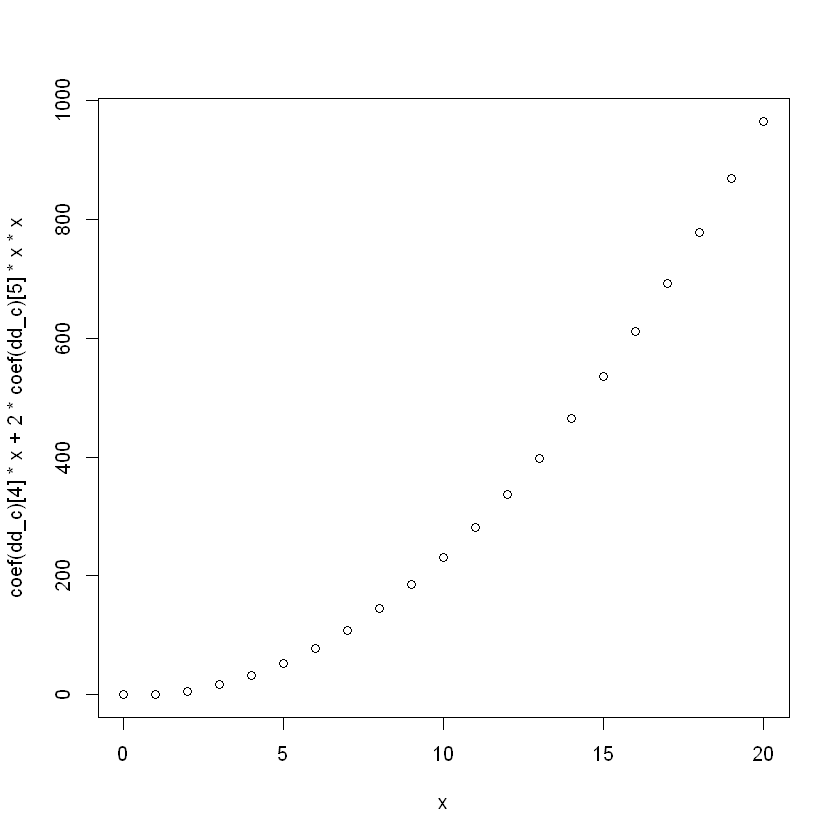

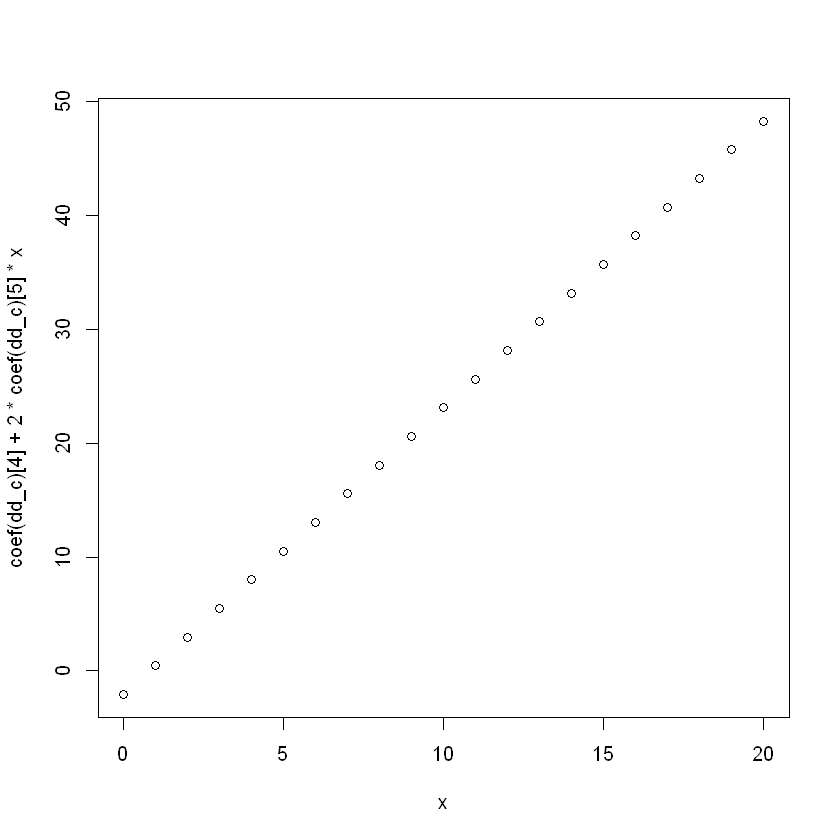

In [10]:
summary(ds$age)
x <- seq(0,20,1)
y<-coef(dd_c)[4] + 2*coef(dd_c)[5]*x
plot(x,coef(dd_c)[4]*x + 2*coef(dd_c)[5]*x*x)
plot(x,coef(dd_c)[4] + 2*coef(dd_c)[5]*x)

<font color=green> Réponse : le graphique 1 donne le prix d'une maison d'un an, de deux ans, etc, toutes les autres variables raportées à 0. Techniquement c'est le graphique 2 qui donne donne l'effet d'une année supplémentaire selon le prix. "Normalement cet effet est un point car il est vrai quel que soit le niveau de départ de x. Ici l'effet est non linéaire : selon si on passe de 1 à 2 ans ou de 10 à 11 ans, l'effet est plus ou moins grand.</font>

# 5. Tester la robustesse des résultats

Quelle est l'hypothèse qui conditionne la validité de l'estimateur par double différence ? 

<font color=green> Réponse : l'hypothèse des tendances parallèles : en l'absence d'incinérateur, les prix des deux groupes de maisons auraient évolué de la même manière. </font>

Peut-on tester cette hypothèse directement ?

<font color=green> Réponse: on ne peut jamais tester formellement cette hypothèse car on n'observe pas la même maison à proximité ET hors de la zone de l'incinérateur. Problème classique de contrefactuel. </font>

Quelles sont les 3 manières de convaincre votre lecteur que l'hypothèse est bien validée ? Avez-vous des idées pour implémenter ces différents tests de robustesse ?

<font color=green> 

Les 3 tests pour convaincre de la validité de l'hypothèses des tendances parallèles (common trend) : 

- Falsification ou test placebo;
- Utiliser un groupe témoin difféerent;
- Réplication avec d'autres variables dépendantes qui ne devraient pas être affectées

Idées : 
- Placebo : il faut des années précédentes, or nous ne les avons pas. 
- Groupe témoin : on peut faire varier le rayon de définition de notre variable *nearinc*
- Réplication : on peut voir si les caractéristiques des logements ne changent pas en remplaçant le prix par les caractéristiques. Elles ne devraient pas bouger. 

</font>

On réussit à trouver d'autres données pour les années précédentes: 1976 et 1974. Ces données se trouvent dans le fichier simulé : **TD9_kielmc_generated_forplacebo**.

On propose donc un test placebo. 

a) Ouvrir ces données. 

In [11]:
#ouverture des données
dsp<-readRDS(file="TD9_kielmc_generated_forplacebo")

b) On réalise d'abord le test placebo visuel en présentant l'évolution du prix moyen des maisons *price* dans le temps graphiquement, selon si les maisons sont proches ou loin de l'incinérateur *nearinc*.  

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.2976  1.0000  1.0000 

Eloigné  Proche 
    446     189

No summary function supplied, defaulting to `mean_se()


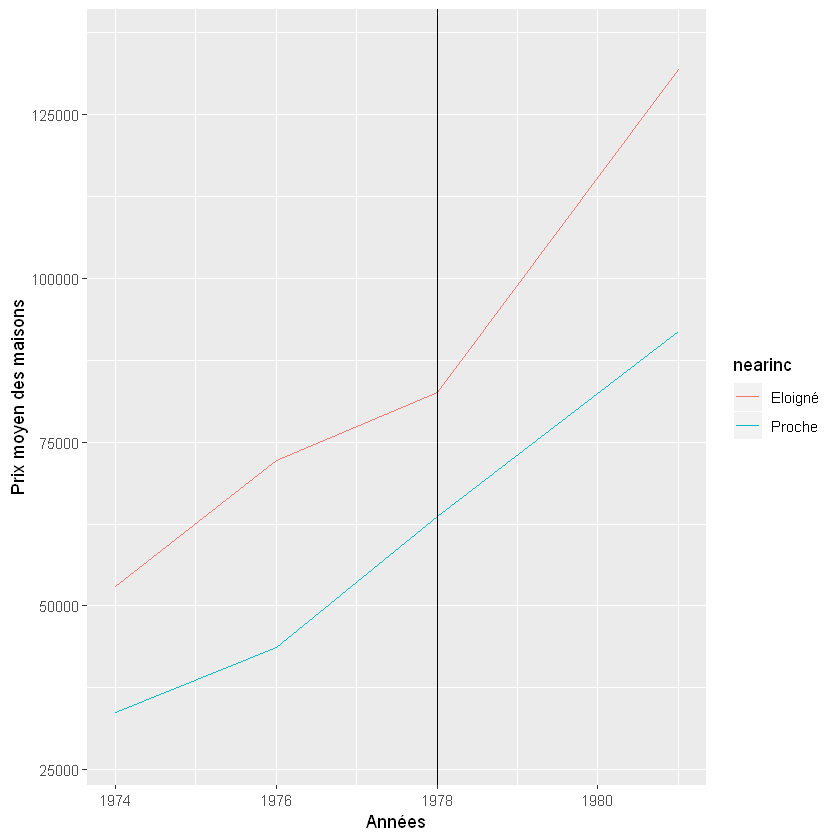

In [12]:
#test visuel : 
library(ggplot2)
summary(dsp$nearinc)
dsp$nearinc<-factor(dsp$nearinc, levels=c(0,1), labels=c("Eloigné","Proche"))
summary(dsp$nearinc)
ggplot(dsp, aes(x=year, y=price, color = nearinc)) +
    stat_summary(geom = 'line') +
    geom_vline(xintercept = 1978) + xlab("Années") + ylab("Prix moyen des maisons")

c) On estime formellement une régression placebo sur le sous-échantillon de 1974-1976.

In [13]:
#test placebo sur sous échantillon year<1978
dd_p<-lm(lprice~nearinc + factor(year) + nearinc:factor(year) + poly(age,2) + area + land + rooms + baths + intst, data=dsp[dsp$year<1978,])
summary(dd_p)


Call:
lm(formula = lprice ~ nearinc + factor(year) + nearinc:factor(year) + 
    poly(age, 2) + area + land + rooms + baths + intst, data = dsp[dsp$year < 
    1978, ])

Residuals:
     Min       1Q   Median       3Q      Max 
-15.4840  -0.1633   0.0307   0.3069   1.6362 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     8.014e+00  5.683e-01  14.102  < 2e-16 ***
nearincProche                   6.768e-02  2.373e-01   0.285  0.77566    
factor(year)1976                2.387e-02  1.491e-01   0.160  0.87292    
poly(age, 2)1                  -6.813e+00  1.318e+00  -5.171 4.24e-07 ***
poly(age, 2)2                   3.968e+00  1.463e+00   2.713  0.00705 ** 
area                            4.155e-04  1.221e-04   3.402  0.00076 ***
land                            1.565e-06  1.637e-06   0.956  0.33964    
rooms                           2.125e-01  8.773e-02   2.422  0.01603 *  
baths                           1.650e-01  1.

d) Conclure.

<font color=green> Le test placebo (visuel et formel) tend à suggérer que l'hypothèse des tendances parallèles est valide. Certes, avant l'implantation de l'incinérateur, le quartier étant déjà moins bien évalué ; mais les tendances d'évolution du prix étaient les mêmes, jusqu'à l'incinération, où on observe une divergence. Alors que les prix augmentent fortement hors zone, ils augmentent mais moins vite à proximité.
</font>